In [53]:
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent
sys.path.append(str(project_root))
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from visualization.utils import defaultColors
from helpers import load_from_path, save_image, get_dfs

import pandas as pd
from pathlib import Path
import numpy as np

In [54]:

exp = "GAS-004"
df, df_mean_std = get_dfs(exp)
df = df.reindex(sorted(df.columns), axis=1)
df_mean_std = df_mean_std.reindex(sorted(df_mean_std.columns), axis=1)

In [55]:
df_xy = pd.read_excel(f"./final/{exp}/xy.xlsx", index_col=0)
df_xy
# rename columns to remove leading "4"
df_xy.columns = [col.split("EXP")[-1] for col in df_xy.columns]
df_xy

,0,100,101,10,11,12,13,14,15,16,...,91,92,93,94,95,96,97,98,99,9
2theta,,,,,,,,,,,,,,,,,,,,,
10.0015,19.323,7.604,2.448,4.062,3.385,21.146,4.479,194.687,3.542,155.104,...,142.135,3.490,151.979,3.750,151.458,11.771,2.604,15.156,2.448,3.750
10.0318,20.625,7.344,3.177,5.000,3.542,18.854,4.167,186.979,3.490,152.500,...,140.781,3.385,151.823,4.635,153.177,10.104,2.448,13.437,3.281,4.062
10.0620,20.521,8.073,2.031,3.542,4.427,17.552,4.479,190.469,4.115,161.719,...,142.865,3.385,150.781,3.802,151.979,11.042,2.552,12.552,2.344,4.062
10.0923,19.792,8.594,2.552,4.427,4.844,16.979,4.167,173.490,3.594,164.427,...,138.542,3.594,152.344,3.958,156.719,10.000,3.021,13.281,3.385,4.844
10.1226,21.302,7.396,2.604,3.802,4.635,14.635,4.896,164.427,4.531,167.552,...,139.687,2.812,156.250,4.948,164.583,10.469,2.604,13.490,1.979,3.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119.8827,0.833,1.667,0.625,1.458,0.937,1.198,1.406,1.719,1.927,1.354,...,1.510,1.354,1.875,0.781,1.562,1.302,0.729,1.510,0.937,2.083
119.9130,1.042,1.302,0.990,1.354,1.354,0.521,1.406,1.406,1.146,1.615,...,1.146,1.250,1.615,1.354,1.094,1.302,0.729,1.719,0.469,1.823
119.9433,0.469,1.667,0.521,1.302,0.677,0.521,1.354,1.667,1.667,1.146,...,1.146,1.146,0.990,1.250,1.354,1.354,0.312,1.823,0.729,1.615


In [56]:
# apply moving average to the data so that the total number of points is 10% of the original data
window_size = 5


# Apply moving average. The function below applies a simple moving average on a Series.
def moving_average(series, window_size):
    return series.rolling(window=window_size, min_periods=1, center=True).mean()


# Apply moving average to each column in df_xy and downsample the data
df_xy_ma = pd.DataFrame()

# low_res_selction = (df_xy.index > 40) | (df_xy.index < 20)

low_res_selction = df_xy.index > -1

df_low_res_sect = df_xy.loc[low_res_selction]


for column in df_xy.columns:
    # Apply moving average
    ma_series = moving_average(df_low_res_sect[column], window_size)
    # Downsample the data by selecting every nth point, where n is the window size
    downsampled_series = ma_series[::window_size]
    df_xy_ma[column] = pd.concat(
        [df_xy.loc[~low_res_selction][column], downsampled_series]
    ).sort_index()

# use df_xy data from 20 to 40 2theta

# Adjust the index to match the downsampled data
df_xy_ma.index = pd.concat(
    [
        df_xy.loc[~low_res_selction].index.to_series(),
        downsampled_series.index.to_series(),
    ]
).sort_index()

df_xy_ma

C:\Users\queim\AppData\Local\Temp\ipykernel_14924\1066439111.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_xy_ma[column] = pd.concat(
C:\Users\queim\AppData\Local\Temp\ipykernel_14924\1066439111.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_xy_ma[column] = pd.concat(


,0,100,101,10,11,12,13,14,15,16,...,91,92,93,94,95,96,97,98,99,9
2theta,,,,,,,,,,,,,,,,,,,,,
10.0015,20.156333,7.673667,2.5520,4.201333,3.784667,19.1840,4.3750,190.711667,3.715667,156.4410,...,141.9270,3.4200,151.527667,4.062333,152.204667,10.972333,2.534667,13.7150,2.6910,3.9580
10.1529,20.281400,7.281400,2.5206,4.249800,4.135600,14.6144,4.4064,152.395800,4.083400,166.2916,...,139.6562,3.4998,155.781200,4.021000,159.843800,9.854200,2.729000,13.1770,2.8124,3.9584
10.3043,18.895800,6.875000,2.8542,3.749800,4.031200,11.5936,4.1666,114.354400,4.135600,174.5104,...,138.1146,3.7604,157.114600,3.364600,169.218600,9.312600,2.708400,12.1770,2.7396,4.0626
10.4557,16.052200,6.604000,2.4688,4.031400,4.083200,8.3018,4.1876,83.812600,3.979200,189.8854,...,135.3020,3.7082,152.750200,3.906000,166.958000,8.072800,2.458400,11.4062,2.2290,4.1354
10.6071,14.739400,7.010200,2.4274,3.937600,3.697800,8.1876,4.0312,62.583000,4.416600,191.9792,...,124.8958,3.4582,138.062400,4.197800,152.927000,8.187200,2.593600,10.8854,2.3854,3.7190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119.3074,1.239600,1.562400,0.8022,1.291600,1.322800,0.8228,1.5728,1.697800,1.656200,1.5206,...,1.4270,1.3018,1.218800,1.364200,1.343600,1.729200,0.604200,1.4272,0.7916,1.6874
119.4588,0.937600,1.406000,0.6874,1.312400,1.062400,0.8228,1.5520,1.687600,1.500000,1.4164,...,1.2498,1.2290,1.270800,1.208400,1.135400,1.541600,0.614600,1.3122,0.6666,1.5938
119.6102,1.041800,1.447800,0.5834,1.249800,1.062600,0.9062,1.5520,1.604200,1.531200,1.4688,...,1.5830,1.0104,1.083200,1.208400,1.333200,1.656200,0.531400,1.3646,0.5418,1.5938


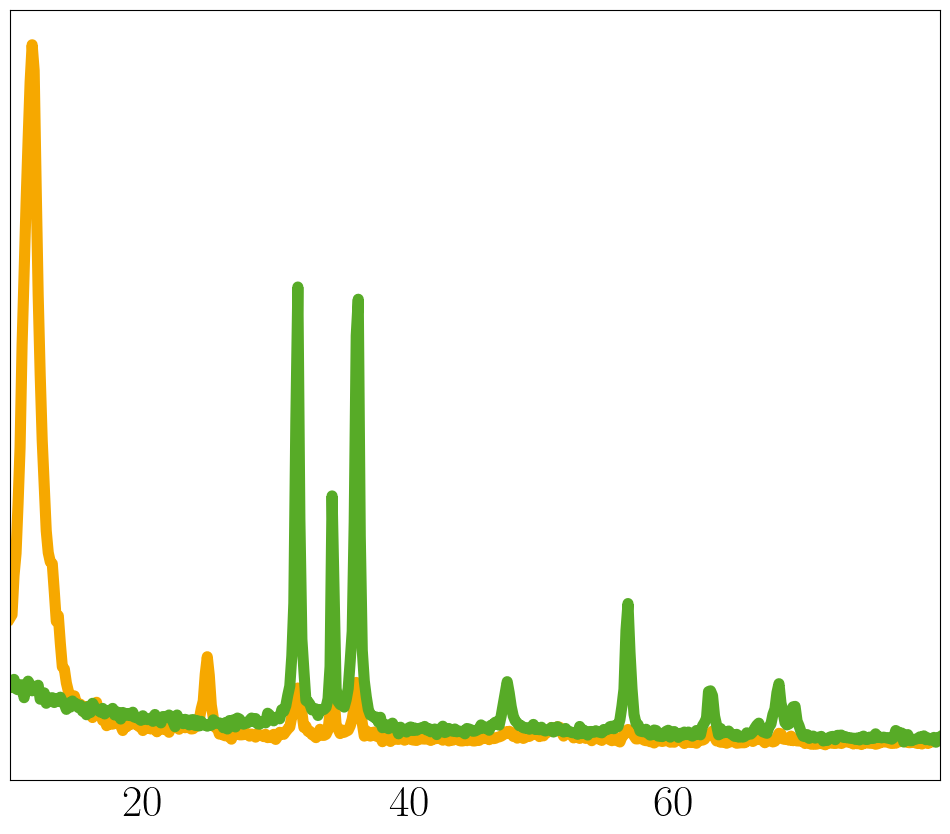

In [61]:
# high res inline plott ipynb
%matplotlib inline 


exp_num = "7"

nums = ["7", "101"]

import matplotlib.pyplot as plt
import numpy as np

# %config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
    # font size
    "font.size": 32,
})

colors = defaultColors

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
 
df_xy_ma_s = df_xy_ma.loc[:80]
 
x = df_xy_ma_s.index

for i, exp_num in enumerate(nums):

    y = df_xy_ma_s[exp_num]

    ax.plot(x, y, label=exp_num, color=colors[i], linewidth=8)

# remove labels and ticks
# ax.set_xlabel("")
ax.set_ylabel("")
# ax.set_xticklabels([])
ax.set_yticklabels([])

#tight x limits
ax.set_xlim(min(x), max(x))

# remove spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# remove ticks
ax.tick_params(axis='both', which='both', length=0)


plt.show()
